In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [5]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br> it is the same for all
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

In [6]:
path = 'C:/Users/ok/Desktop/Week_0/week-0/data'

In [7]:
loader = SlackDataLoader(path)

In [8]:
x = loader.channels

In [9]:
week_path = "C:/Users/ok/Desktop/Week_0/week-0/data/channels/weeks"

In [10]:
# now lets define the path for week 8 and week 9
week_8_path = "C:/Users/ok/Desktop/Week_0/week-0/data/channels/weeks/all-week8"
week_9_path = "C:/Users/ok/Desktop/Week_0/week-0/data/channels/weeks/all-week9"

#now lets extract the data from the all-week8 and all-week9 folders
week_8 = utils.slack_parser(week_8_path)
week_9 = utils.slack_parser(week_9_path)
print('the shape of week_8 dataframe is', week_8.shape) 
print('The shape of week_9 dataframe is', week_9.shape)

the shape of week_8 dataframe is (79, 11)
The shape of week_9 dataframe is (110, 11)


In [11]:
#lets connacate the two weeks into one dataframe
data = pd.concat([week_8, week_9])
data.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,Good morning everyone :blush: welcome to week ...,Garrett Bell,1665385707.569729,text,0,0,0,0,0,all-week8
1,message,Good morning!,Carlos Gross,1665385734.616309,text,0,0,0,0,0,all-week8
2,message,Good Morning.,Samuel King,1665385760.620169,text,0,0,0,0,0,all-week8
3,message,Good Morning!!!,Daniel Brown,1665387214.795849,text,0,0,0,0,0,all-week8
4,message,Good Morning.,Willie Yang,1665388127.826899,text,0,0,0,0,0,all-week8


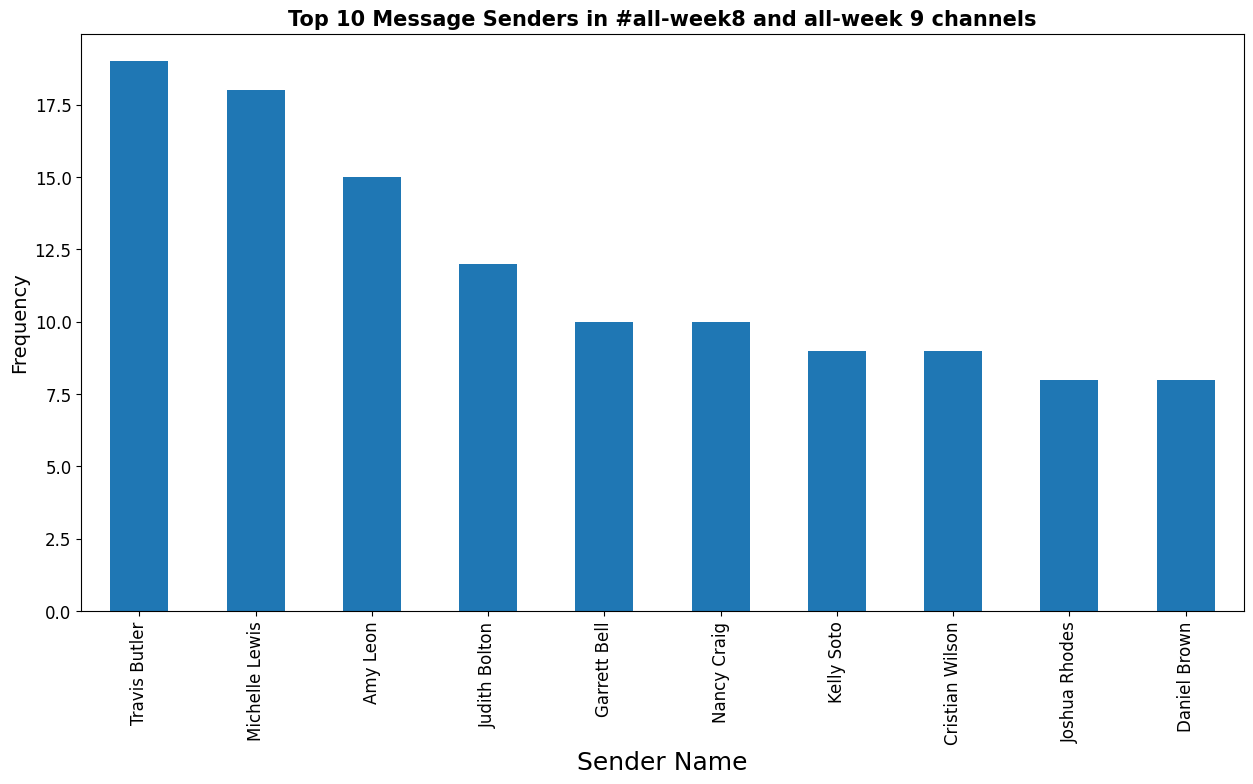

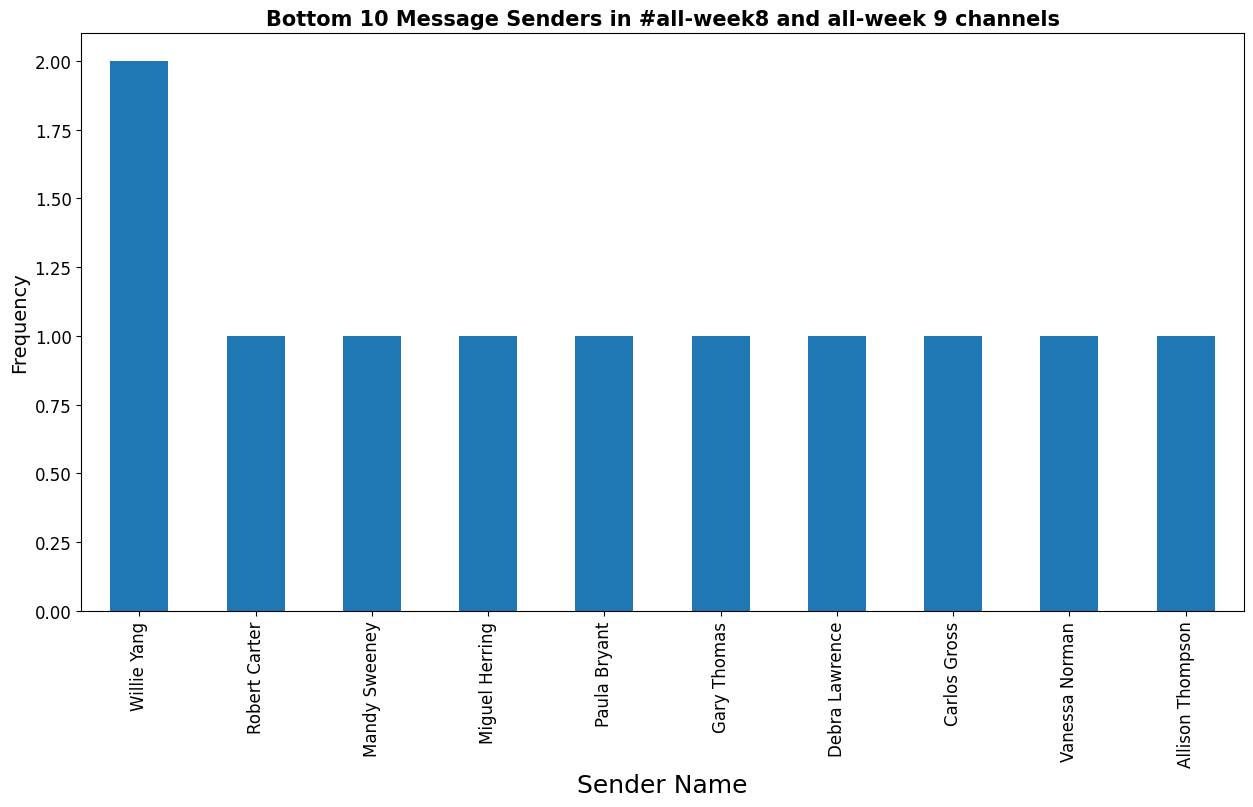

In [12]:
get_top_10_user(data, 'all-week8 and all-week 9')

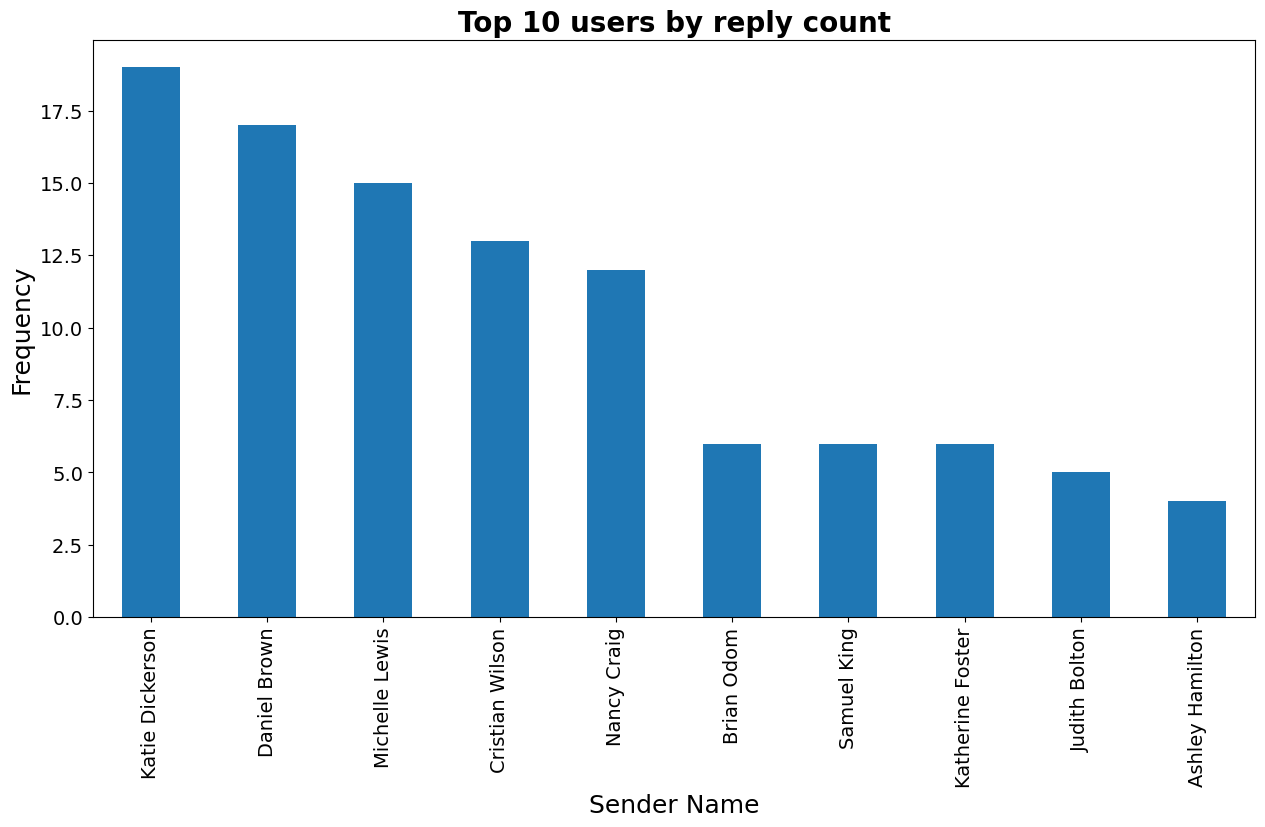

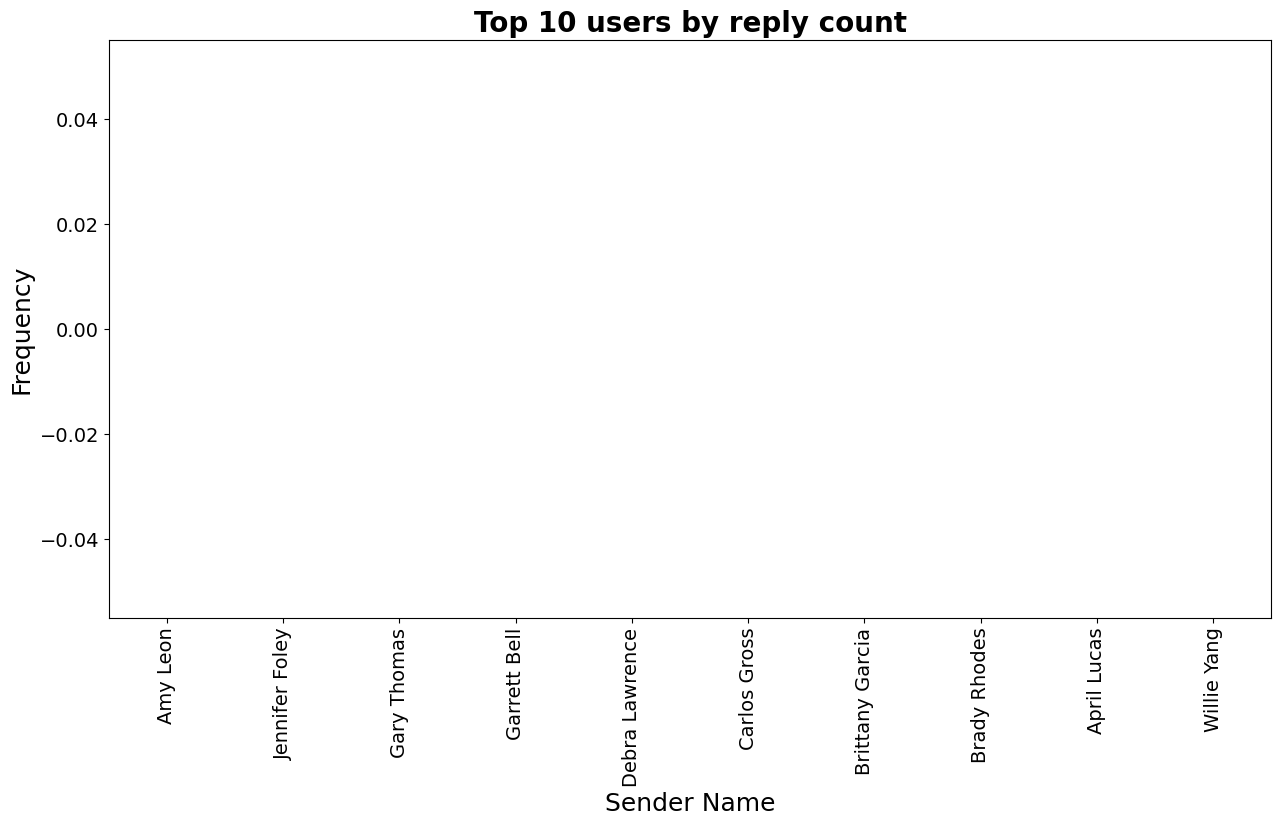

In [33]:
#top 10 and bottom 10 users by reply count

data.groupby('sender_name')['reply_count'].sum().sort_values(ascending=False)[:10]\
.plot(kind='bar', figsize=(15,7.5));
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

data.groupby('sender_name')['reply_count'].sum().sort_values(ascending=False)[-10:]\
.plot(kind='bar', figsize=(15,7.5));
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

In [44]:
mention_counts = data[data['msg_content'].str.contains('@U\w+')]
mention_counts

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
14,message,<@U03UUN8M4RX> In answering my question you sa...,Brian Odom,1665412703.494659,user,1665412703.494659,2,2,"U03UD68RQH3,U03UJKJGRAQ",1665421587.914539,all-week8
18,message,that's true <@U03UD68RQH3> I will keep that i...,Brian Odom,1665421587.914539,text,1665412703.494659,0,0,0,0,all-week8
22,message,Have you gotten an answer for this <@U03U1FNPE...,Phillip Atkins,1665426020.667739,text,1665396091.818989,0,0,0,0,all-week8
33,message,<@U03U1FNPEUX> Thank you,Michelle Lewis,1665467582.233329,user,1665434032.507359,0,0,0,0,all-week8
36,message,Thank you <@U03UJKJGRAQ>,Willie Yang,1665490648.418599,text,1665490319.589579,0,0,0,0,all-week8
38,message,<@U03TEPYRM2P> can we ?,Cristian Wilson,1665502238.832359,user,1665501880.342719,0,0,0,0,all-week8
39,message,I joined late due to internet issues. I would ...,Jennifer Foley,1665502972.148749,text,1665501880.342719,0,0,0,0,all-week8
46,message,"don't confuse it with it's literal meaning, <@...",Brady Rhodes,1665506786.331179,text,1665505715.758419,0,0,0,0,all-week8
48,message,<@U03V6HMRPGQ> yeah,Brady Rhodes,1665507662.646459,user,1665505715.758419,0,0,0,0,all-week8
52,message,<@U03TEPYRM2P> The uploaded file has only 360p...,Gary Thomas,1665522409.054749,user,1665501880.342719,0,0,0,0,all-week8


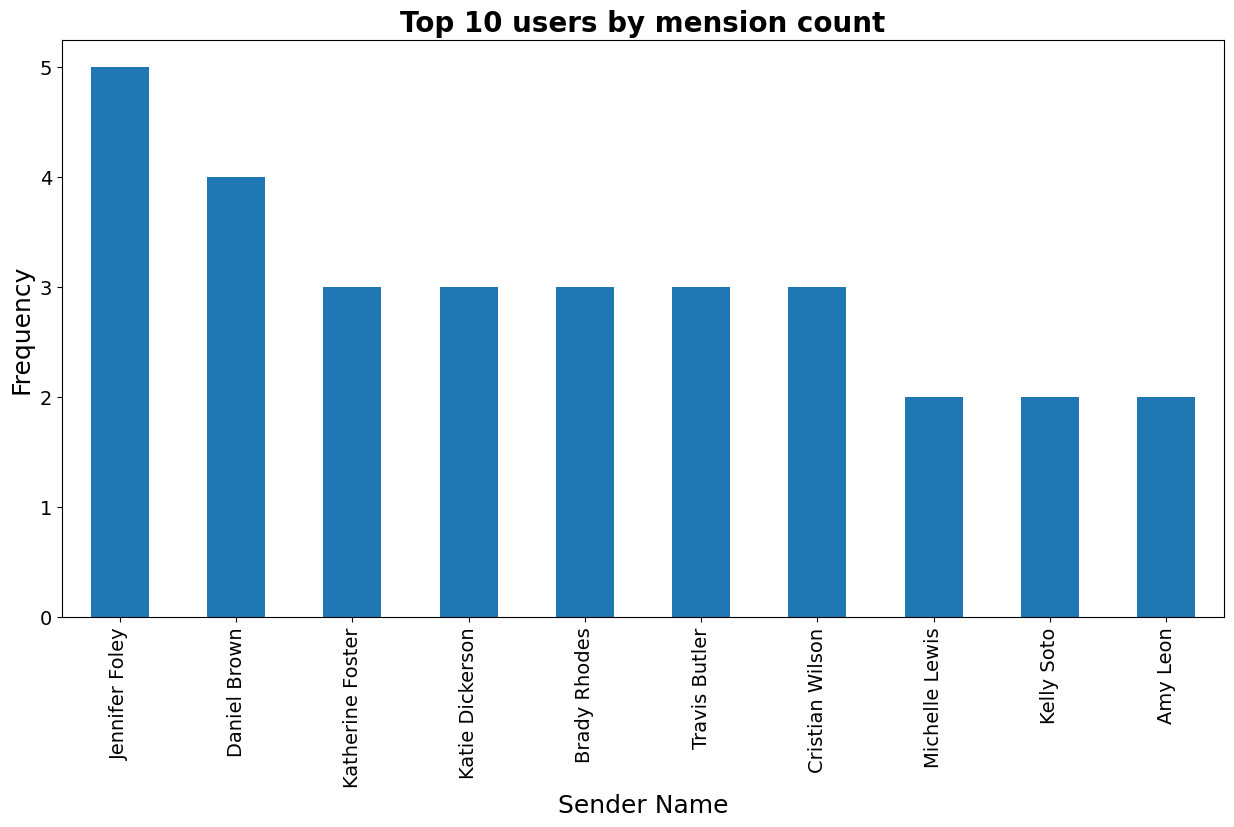

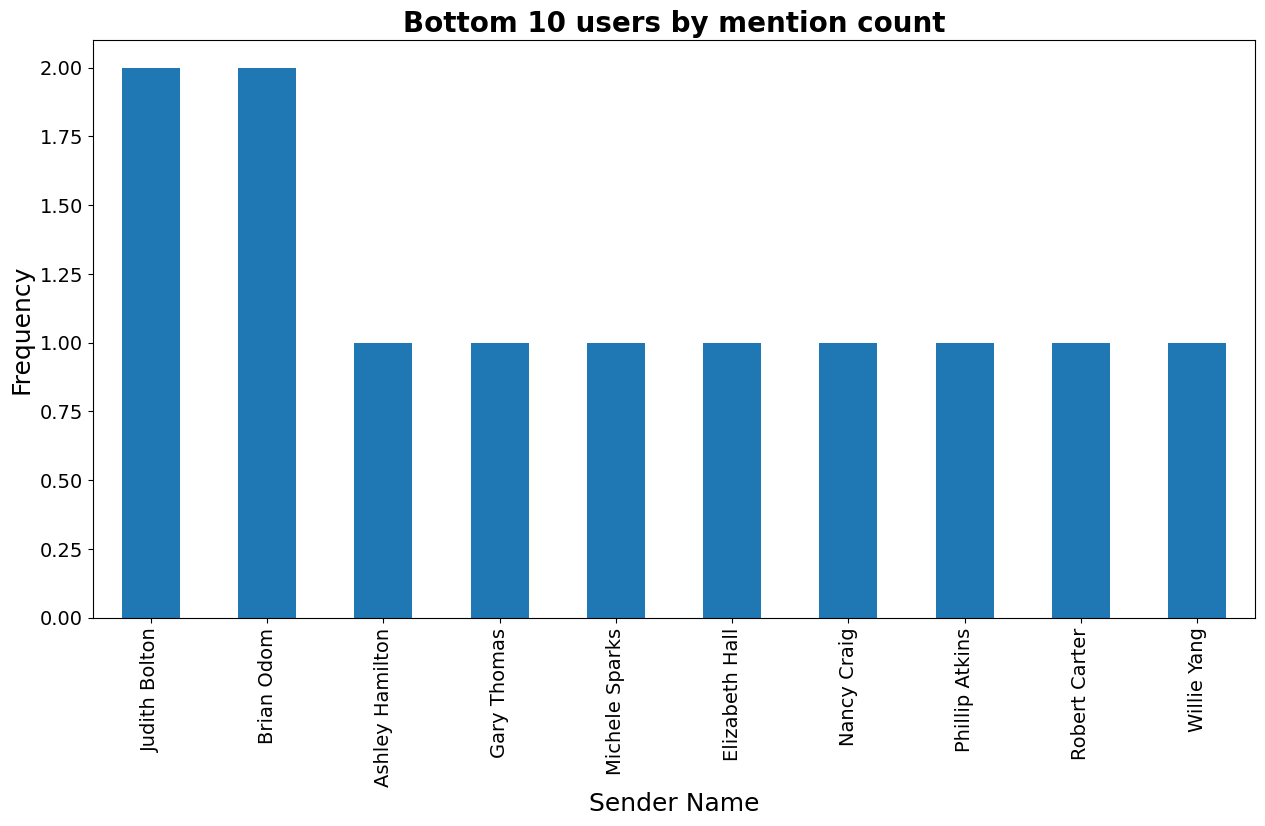

In [48]:
#top and bottom 10 users by mentions
#first lets filter the mention messages  (they contain @)
mention_counts = data[data['msg_content'].str.contains('@U\w+')]
#find the top 10 users by mention count
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
.plot(kind='bar', figsize=(15,7.5));
plt.title('Top 10 users by mension count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[-10:]\
.plot(kind='bar', figsize=(15,7.5));
plt.title('Bottom 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

In [ ]:
#top and bottom 10 users by reaction count


In [13]:
def get_top_10_user(data, channel='Random'):
    """get user with the highest number of message sent to any channel"""

    data['sender_name'].value_counts()[:10].plot.bar(figsize=(15, 7.5))
    plt.title(f'Top 10 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

    data['sender_name'].value_counts()[-10:].plot.bar(figsize=(15, 7.5))
    plt.title(f'Bottom 10 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def draw_avg_reply_count(data, channel='Random'):
    """who commands many reply?"""

    data.groupby('sender_name')['reply_count'].mean().sort_values(ascending=False)[:20]\
        .plot(kind='bar', figsize=(15,7.5));
    plt.title(f'Average Number of reply count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_avg_reply_users_count(data, channel='Random'):
    """who commands many user reply?"""

    data.groupby('sender_name')['reply_users_count'].mean().sort_values(ascending=False)[:20].plot(kind='bar',
     figsize=(15,7.5));
    plt.title(f'Average Number of reply user count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_wordcloud(msg_content, week):    
    # word cloud visualization
    allWords = ' '.join([twts for twts in msg_content])
    wordCloud = WordCloud(background_color='#975429', width=500, height=300, random_state=21, max_words=500, mode='RGBA',
                            max_font_size=140, stopwords=stopwords.words('english')).generate(allWords)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout()
    plt.title(f'WordCloud for {week}', size=30)
    plt.show()

def draw_user_reaction(data, channel='General'):
    data.groupby('sender_name')[['reply_count', 'reply_users_count']].sum()\
        .sort_values(by='reply_count',ascending=False)[:10].plot(kind='bar', figsize=(15, 7.5))
    plt.title(f'User with the most reaction in #{channel}', size=25);
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

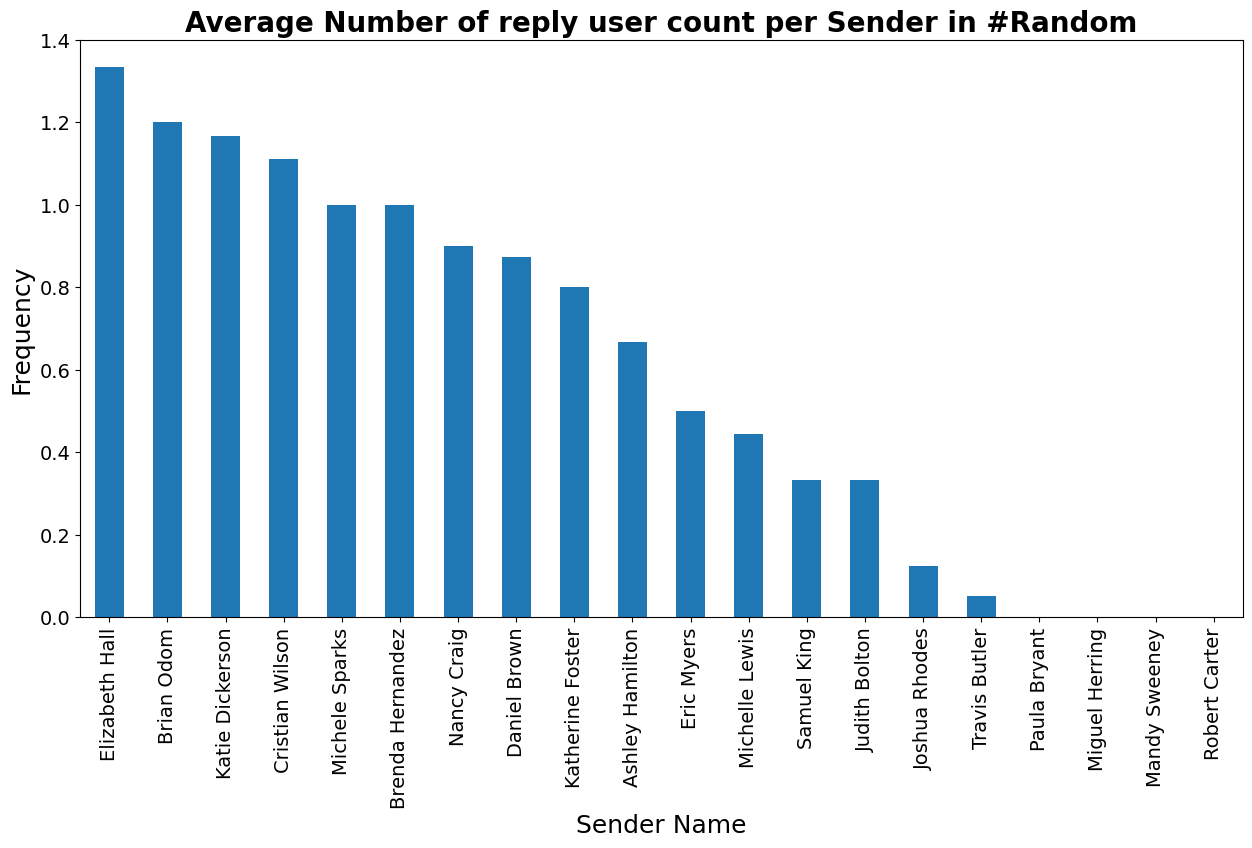

In [14]:
draw_avg_reply_users_count(data)

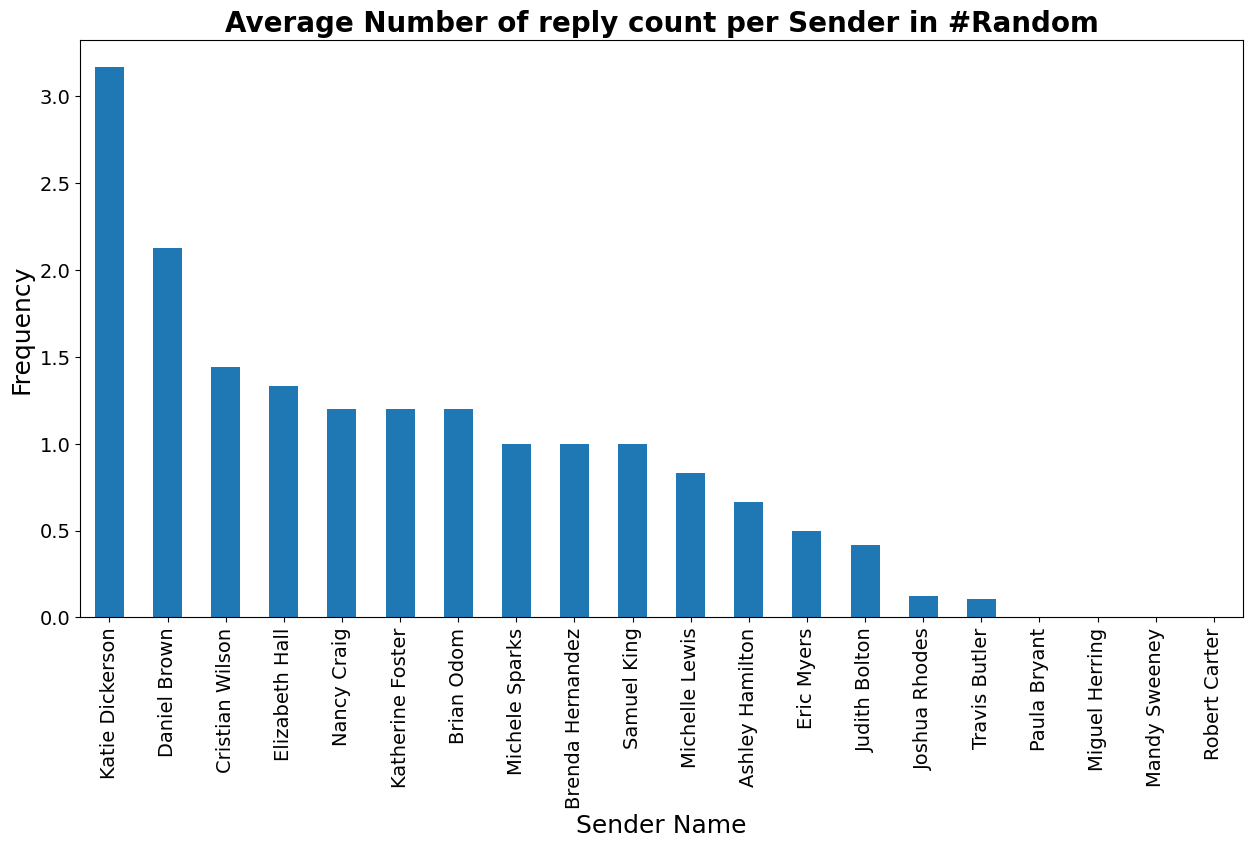

In [15]:
draw_avg_reply_count(data)

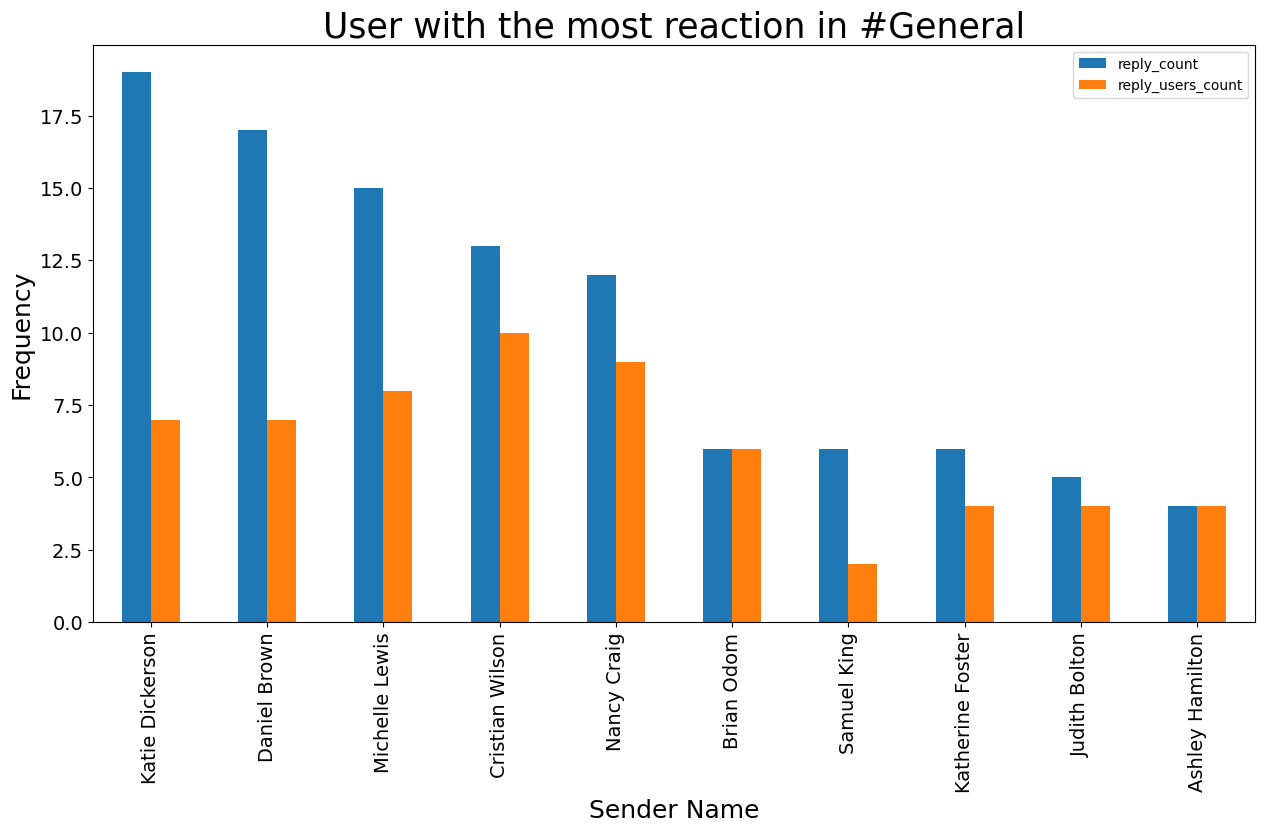

In [16]:
draw_user_reaction(data)

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [17]:
X = data['sender_name'].value_counts()[:10]
Y = data['sender_name'].value_counts()[-10:]

print('the top 10 users by message count are: \n{}'.format(X))
print(f'and the users from the bottom 10 are: \n{Y}')

the top 10 users by message count are: 
Travis Butler      19
Michelle Lewis     18
Amy Leon           15
Judith Bolton      12
Garrett Bell       10
Nancy Craig        10
Kelly Soto          9
Cristian Wilson     9
Joshua Rhodes       8
Daniel Brown        8
Name: sender_name, dtype: int64
and the users from the bottom 10 are: 
Willie Yang         2
Robert Carter       1
Mandy Sweeney       1
Miguel Herring      1
Paula Bryant        1
Gary Thomas         1
Debra Lawrence      1
Carlos Gross        1
Vanessa Norman      1
Allison Thompson    1
Name: sender_name, dtype: int64


In [18]:
data['reply_users'].value_counts()

0                                                                          157
U03UJN29Y4C                                                                  2
U03UUR571A5,U03UJGRN5E0,U03UJH1EQQL,U03UG1Z21JP,U03UVHCV6KB,U03UJN29Y4C      1
U03UG32J3PC,U03UUMR26Q1                                                      1
U03UJGP0C68,U03UJH1EQQL,U03U1FNPEUX                                          1
U03UJGP0C68,U03V785NLSU                                                      1
U03UG4Q7V42,U03U1HAG9TR,U03UP7V9Q57                                          1
U03UD68RQH3                                                                  1
U03UUR571A5                                                                  1
U03UUR571A5,U03UJN29Y4C                                                      1
U03UJH1EQQL,U03UG5VFN03                                                      1
U03UUR571A5,U03UJGP0C68,U03UJN29Y4C,U03UG5VFN03                              1
U03UVHCV6KB                                         

In [19]:
#distinguish which messages have replies and which dont
g = data[data.reply_count != 0]


In [20]:
# which user has the highest number of reply counts?


In [21]:
# Visualize reply counts per user per channel


In [22]:
# what is the time range of the day that most messages are sent?


In [23]:
# what kind of messages are replied faster than others?


In [24]:
# Relationship between # of messages and # of reactions


In [25]:
# Classify messages into different categories such as questions, answers, comments, etc.


In [26]:
# Which users got the most reactions?


In [27]:
# Model topics mentioned in the channel


In [28]:
# What are the topics that got the most reactions?


### Harder questions to look into

In [29]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?